# Analysis of Academy Awards

### Content
+ Introduction: Academy Awards
+ Data description and objectives
+ Data preparation and validation
+ Data analysis and visualization 
+ Conclusion

![title](selfie.jpg)

## 1. Introduction: Academy Awards

Academy Award, in full Academy Award of Merit, by name Oscar, any of a number of awards presented annually by the Academy of Motion Picture Arts and Sciences, located in Beverly Hills, California, U.S., to recognize achievement in the film industry. The awards were first presented in 1929, and winners receive a gold-plated statuette commonly called Oscar.

Winners are chosen from the following 24 categories: best picture, actor, actress, supporting actor, supporting actress, directing, original screenplay, adapted screenplay, cinematography, production design, editing, original score, original song, costume design, makeup and hairstyling, sound mixing, sound editing, visual effects, foreign-language film, animated feature film, animated short, live-action short, documentary feature, and documentary short. The academy also presents scientific and technical awards, special achievement awards, honorary awards, the Jean Hersholt Humanitarian Award, the Irving G. Thalberg Memorial Award (for excellence in producing), and the Gordon E. Sawyer Award (for technological contributions), although these are not necessarily awarded annually. 

Only members of the Academy of Motion Picture Arts and Sciences may nominate and vote for candidates for the Oscars. The academy is divided into various branches of film production, and the nominees in each award category are chosen by the members of the corresponding branch; thus, writers nominate writers, directors nominate directors, and so forth. The entire academy membership nominates the candidates for best picture and votes to determine the winners in most of the categories.

#### Interesting Fact 
The origins of the statuette’s nickname, Oscar, have been traced to three sources. Actress Bette Davis claimed that the name derived from her observation that the backside of the statuette looked like that of her husband Harmon Oscar Nelson. Columnist Sidney Skolsky maintained that he gave the award its nickname to negate pretension. The name has also been attributed to academy librarian Margaret Herrick, who declared that the statuette looked like her Uncle Oscar. The true origin of the nickname has never been determined.

Source (https://www.britannica.com/art/Academy-Award)

## 2. Data description and objectives

"And the Oscar goes too...". The phrase that makes millions of fans eagerly await the award ceremony. Families all over the world gather to watch how their favorite actors and directors are being awarded. However, not many people know what happens on the other side of the screen. How and where those films were shot? What are the budget and revenue? How do movie trends change and where were they produced? The aim of this project is to give an answer to these kinds of questions.

This project contains official records of past Oscar winners and nominees between 1927 and 2020.  Data is selectively taken from multiple data sources. Here is the list of variable used for this analysis:
+ Film Year - year of filming
+ Ceremony Year - year of ceremony
+ Category - nominees
+ Name - participant's name
+ Film - title of film
+ Birth Place - place of birth
+ Race Ethnicity - racial identity
+ Religion - participant religion
+ Budget - allocated budget
+ Revenue - revenue of the film
+ Genre - genre of the film
+ Production Company - company that was engaged in production
+ Production Country - release country
+ Release Date - date of release
+ Runtime - duration of the film
+ Original Language - original language of the film



The project is divided into five parts of data analysis and visualization:
1. Analyze the best and the worst performances 
2. Analyze the production of films
3. Analyze directors and actors/actresses
4. Analyze the changes in nominations
5. Analyze the trendings of genres

## 3. Data preparation and validation

### 3.1. Data acquisiton: Getting datasets

Let's start! In this data analysis, we will be using three different datasets. 
+ Main - is the one that interacts and joins with two others. It contains information about the Oscars itself (ceremony, category, participants, films, and winners). The key difference of this table is that all columns of it will be used for analysis, which basically means that all tables will be joined with it. 
+ Personal - contains personal info about directors and actors/actresses such as birthdate, birthplace, religion, ethnicity and etc. 
+ Detailed - as it's title suggests, this table incorporates data about movie budget and revenue, genre, production country and company and etc.

Our data acquisiton starts with importing modules and reading .csv files

In [1]:
# import all modules that will be used
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter


# read needed csv files
main = pd.read_csv("the_oscar_award.csv", encoding = "latin") 
personal = pd.read_csv("demographics.csv", encoding = "latin")
detailed = pd.read_csv("detailed.csv", encoding = "latin", sep=";", engine="python", parse_dates=["release_date"]) 

 &#8593; As you can see there were some difficulties with reading "detailed.csv" file, so I fixed it using more detailed functionality. 
 
 &#8595; Let's take a look at original tables. Pay attention at initial shape.

In [2]:
main

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10390,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [3]:
personal

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,670946276,False,finalized,3,2/10/15 2:00,"London, England",1.0,7-Mar-71,1.0,White,...,Best Supporting Actress,http://www.nndb.com/people/309/000032213/,NaN,NaN,The Constant Gardener,Rachel Weisz,NaN,NaN,NaN,NaN
437,670946299,False,finalized,3,2/10/15 2:04,"Manchester, England",1.0,20-Oct-56,1.0,White,...,Best Director,http://www.nndb.com/people/887/000044755/,NaN,NaN,Slumdog Millionaire,Danny Boyle,NaN,NaN,NaN,NaN
438,670964912,False,finalized,3,2/10/15 2:03,"Chicago, Il",1.0,26-Jul-22,1.0,White,...,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,NaN,NaN,All the President's Men,Jason Robards,NaN,NaN,NaN,NaN
439,670964956,False,finalized,3,2/10/15 2:01,"Laurel, Ne",1.0,31-Aug-28,1.0,White,...,Best Supporting Actor,http://www.nndb.com/people/764/000022698/,NaN,NaN,Affliction,James Coburn,NaN,NaN,NaN,NaN


In [4]:
detailed

,ï»¿id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329039,469215,0,Documentary|History|TV Movie,tt5430190,en,The Day Hitler Died,The story of Hitlerâs final hours told by pe...,0.0045,History Channel,United States of America,...,46.0,Deutsch,Released,"April 30th, 1945",The Day Hitler Died,7.0,1,1,1,2
329040,469216,0,NaN,NaN,de,Mobb Deep - Life of the Infamous: The Videos,NaN,0.00045,Sony Music Entertainmant,United States of America,...,NaN,English,Released,NaN,Mobb Deep - Life of the Infamous: The Videos,9.0,1,1,1,1
329041,469217,0,Drama|Comedy,NaN,en,#idiot,"In the modern day pursuit of fame and fortune,...",1.37217,none,Malaysia,...,11.0,English,Released,NaN,#idiot,0.0,0,0,1,1
329042,469218,0,Drama|Comedy,tt6391664,en,Conspiracy P.I.E,Director Levi A. Taylor invites you on a nosta...,0.0096,none,United States of America,...,12.0,English,Released,NaN,Conspiracy P.I.E,0.0,0,0,1,1


### 3.2.1. Data manipulation: Merging datasets (main, personal)

Let's add together main and personal. Since we are going to merge them by participant names, before that it is important to check whether each set has an invalid value in it.

In [5]:
#Checking for invalid values
main_name = main[main['name'].isna() == False]
personal_name = personal[personal['person'].isna() == False]

In [6]:
#Merging tables using merge() function
main_personal = pd.merge(main_name, personal_name, left_on = 'name', right_on = 'person', how = 'left')

In [7]:
main_personal

,year_film,year_ceremony,ceremony,category,name,film,winner,_unit_id,_golden,_unit_state,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,670454440.0,False,finalized,...,Best Actor,http://www.nndb.com/people/738/000063549/,NaN,NaN,The Last Command,Emil Jannings,NaN,NaN,NaN,NaN
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,670454604.0,False,finalized,...,Best Actress,http://www.nndb.com/people/129/000043000/,NaN,NaN,7th Heaven,Janet Gaynor,NaN,NaN,NaN,NaN
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10906,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True,670454743.0,False,finalized,...,Best Supporting Actress,http://www.nndb.com/people/883/000022817/,NaN,NaN,The Accidental Tourist,Geena Davis,NaN,NaN,NaN,NaN
10907,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10908,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.3.1. Data Validation: Removing duplicates and missing values (main, personal)

Ideally, we should add them together without missing any value. So, here are the things to do:
+ Replace invalid values by NaN - we are going to detect, remove, and reset them by indexes
+ Remove duplicates - using drop_duplicates() function
+ Drop unnecessary columns - with simple drop()

In [8]:
#Saving indexes that have NaN
index = main_personal[main_personal['person'].isna() == True].index

In [9]:
#Drop them by drop()
main_personal.drop(index, inplace = True)

In [10]:
#Reset our indexes using reset_index()
main_personal.reset_index(drop=True, inplace=True)

Amount of rows depreciates significantly, because in personal dataset we are considering only actors/actresses and directors. From 10910 it fell to 1580. This is the computation without replacing duplicates. Let's simply do it with only one statement.

In [11]:
main_personal.drop_duplicates(subset ="name", keep = "first", inplace=True)

In [12]:
main_personal.shape

(340, 34)

Number of rows fell again. From 1580 to 340. The reason is that similar films in the second tables may have a bit difference in orthography, and we have lost about 100 rows. 

&#8595; Now let's remove needless columns for our analysis.

In [13]:
main_personal.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner', '_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')

In [14]:
del main_personal['_unit_id']
del main_personal['_golden']
del main_personal['_unit_state']
del main_personal['_trusted_judgments']
del main_personal['_last_judgment_at']
del main_personal['birthplace:confidence']
del main_personal['date_of_birth:confidence']
del main_personal['race_ethnicity:confidence']
del main_personal['religion:confidence']
del main_personal['sexual_orientation']
del main_personal['sexual_orientation:confidence']
del main_personal['year_of_award']
del main_personal['year_of_award:confidence']
del main_personal['award']
del main_personal['birthplace_gold']
del main_personal['date_of_birth_gold']
del main_personal['movie']
del main_personal['person']
del main_personal['race_ethnicity_gold']
del main_personal['religion_gold']
del main_personal['sexual_orientation_gold']
del main_personal['year_of_award_gold']
del main_personal['biourl']

In [15]:
main_personal

,year_film,year_ceremony,ceremony,category,name,film,winner,birthplace,date_of_birth,race_ethnicity,religion
0,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,"Rorschach, Switzerland",23-Jul-1884,White,Na
1,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,"Philadelphia, Pa",6-Oct-06,White,Na
2,1927,1928,1,DIRECTING (Comedy Picture),Lewis Milestone,Two Arabian Knights,True,"Chisinau, Moldova",30-Sep-1895,White,Na
4,1927,1928,1,DIRECTING (Dramatic Picture),Frank Borzage,7th Heaven,True,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic
5,1928,1929,2,ACTOR,Warner Baxter,In Old Arizona,True,"Columbus, Oh",29-Mar-1889,White,Na
...,...,...,...,...,...,...,...,...,...,...,...
1493,2011,2012,84,ACTRESS IN A SUPPORTING ROLE,Octavia Spencer,The Help,True,"Montgomery, Al",25-May-72,Black,Na
1494,2011,2012,84,DIRECTING,Michel Hazanavicius,The Artist,True,"Paris, France",29-Mar-67,White,Jewish
1519,2013,2014,86,ACTOR IN A LEADING ROLE,Matthew McConaughey,Dallas Buyers Club,True,"Uvalde, Tx",4-Nov-69,White,Na
1520,2013,2014,86,ACTOR IN A SUPPORTING ROLE,Jared Leto,Dallas Buyers Club,True,"Bossier City, La",26-Dec-71,White,Na


### 3.2.2. Data manipulation: Merging datasets (main, detailed)

We are going to run similar steps in order to add together columns main and detailed. In this case, we about to merge them by movie name.

In [16]:
main_movie = main[main['film'].isna() == False]
detailed_movie = detailed[detailed['title'].isna() == False]

In [17]:
main_detailed = pd.merge(main_movie, detailed_movie, left_on = 'film', right_on = 'title', how = 'left')

In [18]:
main_detailed

,year_film,year_ceremony,ceremony,category,name,film,winner,ï»¿id,budget,genres,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,113167.0,0.0,Drama,...,65.0,none,Released,Not in years has the screen given you drama so...,The Noose,0.0,0.0,1.0,1.0,0.0
1,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,132141.0,0.0,Drama,...,96.0,Polski,Released,NaN,The Noose,7.5,2.0,1.0,1.0,1.0
2,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,43197.0,0.0,Drama|History|Western,...,110.0,Deutsch,Released,THE BUGLE SOUNDS... No Mercy! No Quarter! for ...,The Last Command,7.0,4.0,1.0,1.0,3.0
3,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,52679.0,0.0,Drama|History|Romance,...,88.0,No Language,Released,NaN,The Last Command,7.7,15.0,1.0,1.0,1.0
4,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False,104212.0,0.0,Drama,...,70.0,none,Released,NaN,A Ship Comes In,6.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19849,2019,2020,92,WRITING (Original Screenplay),Written by Noah Baumbach,Marriage Story,False,271794.0,0.0,NaN,...,95.0,íêµ­ì´/ì¡°ì ë§,Released,NaN,Marriage Story,5.0,1.0,1.0,1.0,1.0
19850,2019,2020,92,WRITING (Original Screenplay),Written by Sam Mendes & Krysty Wilson-Cairns,1917,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19851,2019,2020,92,WRITING (Original Screenplay),Written by Quentin Tarantino,Once upon a Time...in Hollywood,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19852,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True,48311.0,800000.0,Horror|Science Fiction,...,85.0,English,Released,You will not feel the terror until you experie...,Parasite,5.1,8.0,0.0,1.0,1.0


### 3.3.2. Data Validation: Removing duplicates and missing values (main, detailed)

It is not difficult to see that we are facing with considerably more data, which means that there are more invalid values and duplicates. It is risky because we can lose much more records than in the first run, not 100 but more...

In [19]:
index = main_detailed[main_detailed['title'].isna() == True].index

In [20]:
main_detailed.drop(index, inplace = True)

In [21]:
main_detailed.reset_index(drop=True, inplace=True)

&#8595; In this time simple duplicate() function can damage proper rows. So we are going to delete duplicates with conditions.
Duplicates cheeeeeck
P.S TikTok trend

In [22]:
main_detailed = main_detailed[main_detailed.duplicated(['film', 'name']) == False ]

In [23]:
main_detailed.shape

(9186, 29)

In [24]:
main_detailed.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner', 'ï»¿id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number'],
      dtype='object')

In [25]:
del main_detailed['ï»¿id']
del main_detailed['imdb_id']
del main_detailed['title']
del main_detailed['original_title']
del main_detailed['overview']
del main_detailed['popularity']
del main_detailed['status']
del main_detailed['tagline']
del main_detailed['vote_average']
del main_detailed['vote_count']
del main_detailed['production_companies_number']
del main_detailed['production_countries_number']
del main_detailed['spoken_languages_number']
del main_detailed['spoken_languages']

###### Conclusion
From the manipulations above, we can see that a pretty big amount of data has been lost. (main, personal) = 101 rows are lost, (main, detailed) = 1114 rows are lost. Also, there are some indistinct and abbreviated values

## 4. Data analysis and visualization

Here we are! The most important part of our project, in which we will build graphs and write algorithms. At this stage it is very important to choose the right data for specific tasks. As it was mentioned above, we will consider five main issues:
+ Analyze the best and the worst performances 
+ Analyze the production of films
+ Analyze directors and actors/actresses
+ Analyze the changes in nominations
+ Analyze the trendings of genres

### 4.1. Analyze the best and the worst performances 

To analyze this question, I decided to build a rating of the best and worst Oscar participants. Using a horizontal bar chart, I want to display the names of the participants and the number of wins/loses. For that I need to write a code that will save the name of participants and count how many times they appeared. So let's have a table of 'Directing' category.

In [26]:
#Creating a new table of Directors only
#Since the 'main' table is the Series, we're adjusting it with .str function
dir = main[main['category'].str.find('DIRECTING') == 0]

&#8595; From the new table let's select the rows of winners and losers. Selecting two columns should be performed with '&' logical operator.

In [27]:
director_count1 = dir[(dir['winner'] == True) & (dir['name'].notnull())]
director_count2 = dir[(dir['winner'] == False) & (dir['name'].notnull())]

&#8595; Now we will use the 'collections' module that we have imported above. We will use Counter() as a collection and update it everytime it detects the name of participants.

In [28]:
#Creating a varible of Counter()
director_counter1 = Counter()
director_counter2 = Counter()

#Using update() function for updating collection
director_counter1.update(director_count1['name'])
director_counter2.update(director_count2['name'])

&#8595; Take a look at data that we collected

In [29]:
director_counter1.most_common

<bound method Counter.most_common of Counter({'John Ford': 4, 'Frank Capra': 3, 'William Wyler': 3, 'Lewis Milestone': 2, 'Frank Borzage': 2, 'Frank Lloyd': 2, 'Leo McCarey': 2, 'Billy Wilder': 2, 'Elia Kazan': 2, 'Joseph L. Mankiewicz': 2, 'George Stevens': 2, 'Fred Zinnemann': 2, 'David Lean': 2, 'Milos Forman': 2, 'Oliver Stone': 2, 'Clint Eastwood': 2, 'Steven Spielberg': 2, 'Ang Lee': 2, 'Alfonso CuarÃ³n': 2, 'Alejandro G. IÃ±Ã¡rritu': 2, 'Norman Taurog': 1, 'Victor Fleming': 1, 'Michael Curtiz': 1, 'John Huston': 1, 'Delbert Mann': 1, 'Vincente Minnelli': 1, 'Robert Wise, Jerome Robbins': 1, 'Tony Richardson': 1, 'George Cukor': 1, 'Robert Wise': 1, 'Mike Nichols': 1, 'Carol Reed': 1, 'John Schlesinger': 1, 'Franklin J. Schaffner': 1, 'William Friedkin': 1, 'Bob Fosse': 1, 'George Roy Hill': 1, 'Francis Ford Coppola': 1, 'John G. Avildsen': 1, 'Woody Allen': 1, 'Michael Cimino': 1, 'Robert Benton': 1, 'Robert Redford': 1, 'Warren Beatty': 1, 'Richard Attenborough': 1, 'James L. B

&#8595; We will sort all this info and push it into a list. Working with a list will make it easier to draw graphs later on

In [30]:
#Creating lists for winners and losers
dir_names1 = []
dir_wins1 = []

dir_names2 = []
dir_lose2 = []
    
#Taking info from collections into the new lists    
for item in director_counter1.most_common(10):
    dir_names1.append(item[0])
    dir_wins1.append(item[1])
    
for item in director_counter2.most_common(10):
    dir_names2.append(item[0])
    dir_lose2.append(item[1])

&#8595; And the last step is to set up our graphs

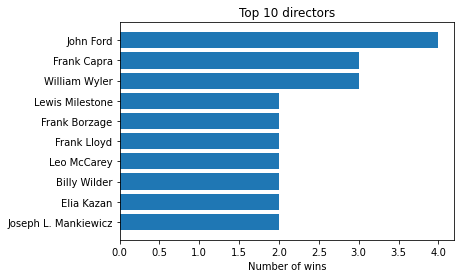

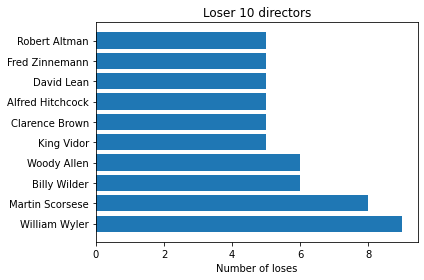

In [31]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.barh(dir_names1, dir_wins1)
ax1.invert_yaxis()
ax2.barh(dir_names2, dir_lose2)

ax1.set_title('Top 10 directors')
ax1.set_xlabel('Number of wins')

ax2.set_title('Loser 10 directors')
ax2.set_xlabel('Number of loses')


plt.tight_layout()
plt.show()

Thus, we inferred that John Ford is the number one among Best Directors and William Wyler is not chasing trophies...

&#8595; These steps can be carried out with all other nominations

In [32]:
actor = main[main['category'].str.find('ACTOR') == 0]
actor_count1 = actor[(actor['winner'] == True) & (actor['name'].notnull())]
actor_count2 = actor[(actor['winner'] == False) & (actor['name'].notnull())]

actor_counter1 = Counter()
actor_counter2 = Counter()


actor_counter1.update(actor_count1['name'])
actor_counter2.update(actor_count2['name'])
    
    
actor_names1 = []
actor_wins1 = []

actor_names2 = []
actor_lose2 = []
    
for item in actor_counter1.most_common(10):
    actor_names1.append(item[0])
    actor_wins1.append(item[1])
    
for item in actor_counter2.most_common(10):
    actor_names2.append(item[0])
    actor_lose2.append(item[1]) 

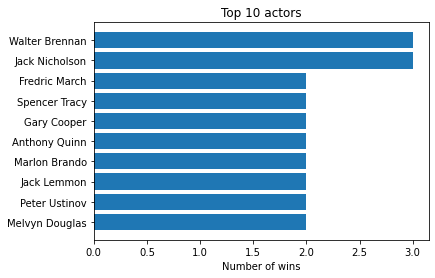

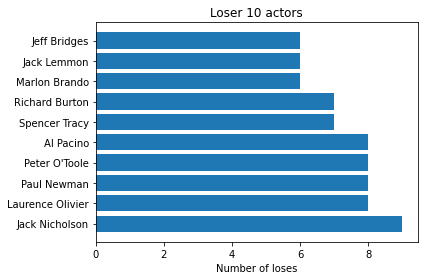

In [33]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.barh(actor_names1, actor_wins1)
ax1.invert_yaxis()
ax2.barh(actor_names2, actor_lose2)

ax1.set_title('Top 10 actors')
ax1.set_xlabel('Number of wins')

ax2.set_title('Loser 10 actors')
ax2.set_xlabel('Number of loses')


plt.tight_layout()
plt.show()

In [34]:
actress = main[main['category'].str.find('ACTRESS') == 0]
actress_count1 = actress[(actress['winner'] == True) & (actress['name'].notnull())]
actress_count2 = actress[(actress['winner'] == False) & (actress['name'].notnull())]

actress_counter1 = Counter()
actress_counter2 = Counter()


actress_counter1.update(actress_count1['name'])
actress_counter2.update(actress_count2['name'])
    
actress_names1 = []
actress_wins1 = []

actress_names2 = []
actress_lose2 = []
    
for item in actress_counter1.most_common(10):
    actress_names1.append(item[0])
    actress_wins1.append(item[1])
    
for item in actress_counter2.most_common(10):
    actress_names2.append(item[0])
    actress_lose2.append(item[1]) 

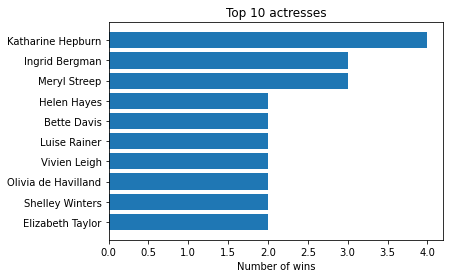

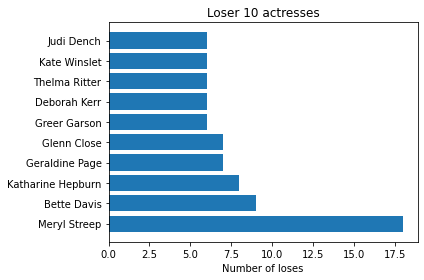

In [35]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.barh(actress_names1, actress_wins1)
ax1.invert_yaxis()
ax2.barh(actress_names2, actress_lose2)

ax1.set_title('Top 10 actresses')
ax1.set_xlabel('Number of wins')

ax2.set_title('Loser 10 actresses')
ax2.set_xlabel('Number of loses')


plt.tight_layout()
plt.show()

In [36]:
writer = main[main['category'].str.find('WRITING') == 0]
writer_count1 = writer[(writer['winner'] == True) & (writer['name'].notnull())]
writer_count2 = writer[(writer['winner'] == False) & (writer['name'].notnull())]

writer_counter1 = Counter()
writer_counter2 = Counter()


writer_counter1.update(writer_count1['name'])
writer_counter2.update(writer_count2['name'])
    
writer_names1 = []
writer_wins1 = []

writer_names2 = []
writer_lose2 = []
    
for item in writer_counter1.most_common(10):
    writer_names1.append(item[0])
    writer_wins1.append(item[1])
    
for item in writer_counter2.most_common(10):
    writer_names2.append(item[0])
    writer_lose2.append(item[1]) 

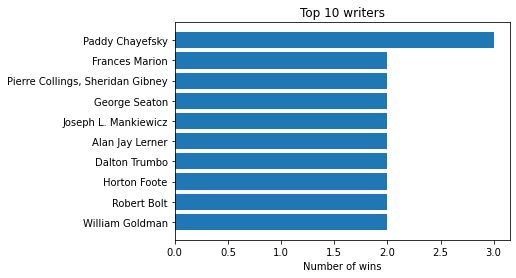

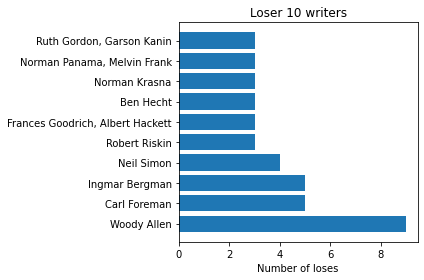

In [37]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.barh(writer_names1, writer_wins1)
ax1.invert_yaxis()
ax2.barh(writer_names2, writer_lose2)

ax1.set_title('Top 10 writers')
ax1.set_xlabel('Number of wins')

ax2.set_title('Loser 10 writers')
ax2.set_xlabel('Number of loses')


plt.tight_layout()
plt.show()

In [38]:
film_count1 = main[(main['film'].notnull()) & main['winner'] == True]
film_count2 = main[(main['film'].isna() == False) & (main['winner'] == False)]

film_counter1 = Counter()
film_counter2 = Counter()



film_counter1.update(film_count1['film'])
film_counter2.update(film_count2['film'])
    
    
film_names1 = []
film_wins1 = []

film_names2 = []
film_lose2 = []
    
for item in film_counter1.most_common(5):
    film_names1.append(item[0])
    film_wins1.append(item[1])
    
for item in film_counter2.most_common(5):
    film_names2.append(item[0])
    film_lose2.append(item[1]) 

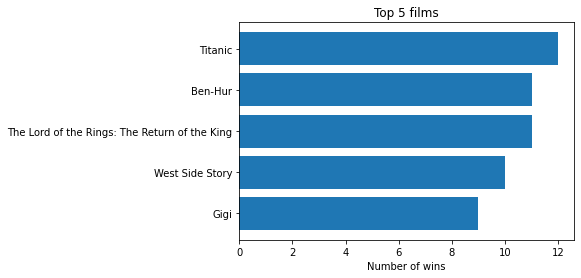

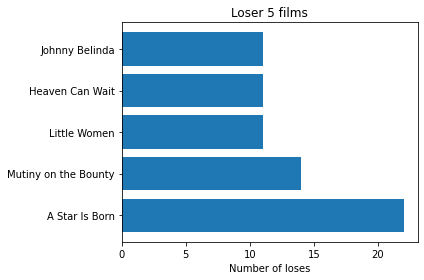

In [39]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.barh(film_names1, film_wins1, align='center')
ax1.invert_yaxis()
ax2.barh(film_names2, film_lose2)

ax1.set_title('Top 5 films')
ax1.set_xlabel('Number of wins')

ax2.set_title('Loser 5 films')
ax2.set_xlabel('Number of loses')


plt.tight_layout()
plt.show()

###### Conclusion
From these graphs we can conclude that every category has their own leaders and celebrities
+ Directors: John Ford got 4 statuettes and this is a record so far. William Wyler ranks second as the best (3 statuettes), but also ranks first as the worst(more than 8 loses).
+ Actors: Jack Nicholson is the best actor with a maximum 3 wins and also he lost the most.
+ Actresses: If you ask me who is the most active actress of the Academy Awards history, I will answer - Meryl Streep. She lose 18 times! Despite this she is the second best actress.
+ Writers: Have you ever heard of Paddy Chayefsky? It's true that he is the best writers, because he won 3 statuettes. I feel sorry for Woody Allen... more than 8 loses.
+ Films: Well, no wonder Titanic is the best movie ever according to Academy Awards. This film won 12 statuettes.

### 4.2. Analyze the production of films

Indeed, behind the camera there are a lot of processes that the audience does not know about. I've been always interested in this thing. I was wondering how the budget managed, how the locations are choosed, editing and releasing process and so on. Here we have this opportunity and I what to start with pulling out the most popular release seasons. 

##### Warning: There is a problem that occurs when I try to add a new column for an existing table. Problem is written in the red box by compiler itself. Problem does not interfere with our analysis, so just ignore it.

&#8595;First, I need separate columns of months. Since where are using DatetimeIndex function we can't create new table. That is why we should add these column to our existing table.

In [40]:
# Adding new column for out main_detailed table
main_detailed['release_month'] = pd.DatetimeIndex(main_detailed['release_date']).month

<ipython-input-40-65451eced81f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_detailed['release_month'] = pd.DatetimeIndex(main_detailed['release_date']).month


New column got data as a float type. For our analysis we need the real names of months. 

&#8595;Let's replace them by using replace() function.

In [41]:
# Replace numbers with the real month names
main_detailed['release_month'] = main_detailed['release_month'].replace(1,'January')
main_detailed['release_month'] = main_detailed['release_month'].replace(2,'February')
main_detailed['release_month'] = main_detailed['release_month'].replace(3,'March')
main_detailed['release_month'] = main_detailed['release_month'].replace(4,'April')
main_detailed['release_month'] = main_detailed['release_month'].replace(5,'May')
main_detailed['release_month'] = main_detailed['release_month'].replace(6,'June')
main_detailed['release_month'] = main_detailed['release_month'].replace(7,'July')
main_detailed['release_month'] = main_detailed['release_month'].replace(8,'August')
main_detailed['release_month'] = main_detailed['release_month'].replace(9,'September')
main_detailed['release_month'] = main_detailed['release_month'].replace(10,'October')
main_detailed['release_month'] = main_detailed['release_month'].replace(11,'November')
main_detailed['release_month'] = main_detailed['release_month'].replace(12,'December')

<ipython-input-41-18f160de669e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_detailed['release_month'] = main_detailed['release_month'].replace(1,'January')
<ipython-input-41-18f160de669e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_detailed['release_month'] = main_detailed['release_month'].replace(2,'February')
<ipython-input-41-18f160de669e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Now, I would like to have the season of each movie release. I can make it by following the previous steps. 

&#8595;We just have to copy the previous column and replace all months names by their number of season.

In [42]:
# Copying previous column
main_detailed['release_season'] = main_detailed['release_month']

<ipython-input-42-002f6effc7d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_detailed['release_season'] = main_detailed['release_month']


In [43]:
# Replacing the names by numbers
main_detailed['release_season'] = main_detailed['release_season'].replace('January',4)
main_detailed['release_season'] = main_detailed['release_season'].replace('February',4)
main_detailed['release_season'] = main_detailed['release_season'].replace('March',1)
main_detailed['release_season'] = main_detailed['release_season'].replace('April',1)
main_detailed['release_season'] = main_detailed['release_season'].replace('May',1)
main_detailed['release_season'] = main_detailed['release_season'].replace('June',2)
main_detailed['release_season'] = main_detailed['release_season'].replace('July',2)
main_detailed['release_season'] = main_detailed['release_season'].replace('August',2)
main_detailed['release_season'] = main_detailed['release_season'].replace('September',3)
main_detailed['release_season'] = main_detailed['release_season'].replace('October',3)
main_detailed['release_season'] = main_detailed['release_season'].replace('November',3)
main_detailed['release_season'] = main_detailed['release_season'].replace('December',4)

<ipython-input-43-9984b9dd30b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_detailed['release_season'] = main_detailed['release_season'].replace('January',4)
<ipython-input-43-9984b9dd30b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_detailed['release_season'] = main_detailed['release_season'].replace('February',4)
<ipython-input-43-9984b9dd30b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

&#8595;And the last step for this data preparation is to replace numbers by season names.

In [44]:
main_detailed['release_season'] = main_detailed['release_season'].replace(1,'Spring')
main_detailed['release_season'] = main_detailed['release_season'].replace(2,'Summer')
main_detailed['release_season'] = main_detailed['release_season'].replace(3,'Fall')
main_detailed['release_season'] = main_detailed['release_season'].replace(4,'Winter')

<ipython-input-44-080d950163a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_detailed['release_season'] = main_detailed['release_season'].replace(1,'Spring')
<ipython-input-44-080d950163a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_detailed['release_season'] = main_detailed['release_season'].replace(2,'Summer')
<ipython-input-44-080d950163a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

After all we have to collect all the data into the arrays. 

&#8595;Select unique seasons, and then remove last element because it's an empty value

In [45]:
# Selecting unique values from column
seasons = main_detailed['release_season'].unique()

# Deleting the last element
seasons = np.delete(seasons, 4)

&#8595;Count the occurence of each season and fill it into the array

In [46]:
# Counting using value_counts()
winter_count = main_detailed.release_season.value_counts().Winter
spring_count = main_detailed.release_season.value_counts().Spring
summer_count = main_detailed.release_season.value_counts().Summer
fall_count = main_detailed.release_season.value_counts().Fall

# Fill array
seasons_count = [winter_count, spring_count, summer_count, fall_count]

&#8595;I decided to fill the month names by my own, because if we will do it as the previous one, our month names will not be ordered.

In [47]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November',
         'December']

In [48]:
# Counting using value_counts()
january_count = main_detailed.release_month.value_counts().January
february_count = main_detailed.release_month.value_counts().February
march_count = main_detailed.release_month.value_counts().March
april_count = main_detailed.release_month.value_counts().April
may_count = main_detailed.release_month.value_counts().May
june_count = main_detailed.release_month.value_counts().June
july_count = main_detailed.release_month.value_counts().July
august_count = main_detailed.release_month.value_counts().August
september_count = main_detailed.release_month.value_counts().September
october_count = main_detailed.release_month.value_counts().October
november_count = main_detailed.release_month.value_counts().November
december_count = main_detailed.release_month.value_counts().December

# Fill array
months_count = [january_count, february_count, march_count, april_count,
               may_count, june_count, july_count, august_count,
               september_count, october_count, november_count, december_count]

And the last thing is to draw the graph. I chose nested pie chart in order to provide info about each month as well as season.

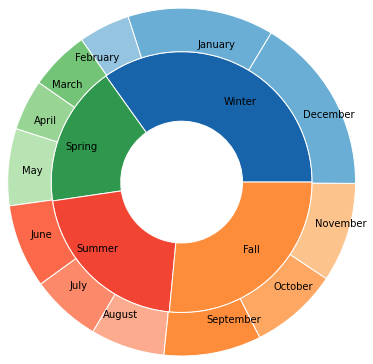

In [49]:
# Create colors
winter, spring, summer, fall=[plt.cm.Blues, plt.cm.Greens, plt.cm.Reds, plt.cm.Oranges]
 
# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _= ax.pie(seasons_count, radius=1.5, labels=seasons, labeldistance=0.7, colors=[winter(0.8), spring(0.7), summer(0.6), fall(0.5)] )
plt.setp(mypie, width=0.8, edgecolor='white')
 

# Second Ring (Outside)
mypie2, _ = ax.pie(months_count, radius=2.5-0.5, labels=months, startangle = 59, labeldistance=0.8, 
                   colors=[winter(0.5), winter(0.4), 
                            spring(0.5), spring(0.4), spring(0.3),
                            summer(0.5), summer(0.4), summer(0.3),
                            fall(0.5), fall(0.4), fall(0.3),
                            winter(0.5)])

plt.setp(mypie2, width=0.5, edgecolor='white')
plt.margins(0,0)
plt.show()

###### Conclusion
I'm sure marketers would pay attention to this analysis because it shows when and even in what month most of the films are released. Perhaps, the success of the film depends not only on the film, but also when and under what conditions it was released.

### 4.3. Analyze directors and actors/actresses

I wonder if there is any pattern in a way that directors and actors/actresses get their Oscars. Let's analyze their personal information. Maybe it depends on their age? Let's check
In our 'main_personal' table there is a column that contains dates of births. But the problem is that it is an object, not a date type. Furthermore, the day is not fully written sometimes, same with the year. I decided to create a function that will detect '-' and will add 0 before days.

In [50]:
#Declaring a function zero()

x = main_personal['date_of_birth']
def zero(x):
    index = x.find('-') #detect '-'
    x = '0' + x[:index] + x[index:] #add 0
    if chr(48) <= x[2] <= chr(57): #means if the character is in the range of ASCII code
        x = x[1] + x[index:] #then move to the right
    return x

birthday = main_personal['date_of_birth'].apply(zero)
birthday

0       23-Jul-1884
1         06-Oct-06
2       30-Sep-1895
4       23-Apr-1894
5       29-Mar-1889
           ...     
1493      25-May-72
1494      29-Mar-67
1519      04-Nov-69
1520      26-Dec-71
1529      01-Mar-83
Name: date_of_birth, Length: 340, dtype: object

&#8595;Similar logic with year.

In [51]:
def year(x):
    if len(x) == 9:
        x = x[:7] + '19' + x[7:]
    return x

birthdate = birthday.apply(year)
birthdate

0       23-Jul-1884
1       06-Oct-1906
2       30-Sep-1895
4       23-Apr-1894
5       29-Mar-1889
           ...     
1493    25-May-1972
1494    29-Mar-1967
1519    04-Nov-1969
1520    26-Dec-1971
1529    01-Mar-1983
Name: date_of_birth, Length: 340, dtype: object

&#8595;Since we've done with setting dates, let's record them into another column in order to access them easily.

In [52]:
main_personal['birthdate'] = birthdate

&#8595;If there are dates that are bigger than the normal size, drop them.

In [53]:
index1 = main_personal[main_personal['birthdate'].str.len() < 11].index
index2 = main_personal[main_personal['birthdate'].str.len() > 11].index
main_personal.drop(index1, axis = 0, inplace = True)
main_personal.drop(index2, axis = 0, inplace = True)

&#8595;Now let's change it's data type into the datetime and get rid of the old column.

In [54]:
main_personal['birthdate'] = pd.to_datetime(main_personal['birthdate'])

In [55]:
del main_personal['date_of_birth']

&#8595;Data is cleaned for this task, let's dive into the process of selecting data. Actually, it is the same logic that we did before, but with some additional steps. First, we have collect all data by category (director, actor and actress). Then, we have to subtract the year of film and year of birth of the person, in order to get his/her age at that time.

In [56]:
#Creating tables for categories by keywords
directing = main_personal[main_personal['category'].str.find('DIRECTING') == 0]

actor = main_personal[main_personal['category'].str.find('ACTOR') == 0]

actress = main_personal[main_personal['category'].str.find('ACTRESS') == 0]

In [57]:
#Pull out the year from the date using DatetimeIndex() and year() functions
directing['birthyear'] = pd.DatetimeIndex(directing['birthdate']).year

#Subtract the 'birthyear' and 'year_film' using lambda
directing['age'] = directing.apply(lambda x: (x['birthyear'] - x['year_film'])*(-1), axis=1)

<ipython-input-57-158b8f8a75af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directing['birthyear'] = pd.DatetimeIndex(directing['birthdate']).year
<ipython-input-57-158b8f8a75af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directing['age'] = directing.apply(lambda x: (x['birthyear'] - x['year_film'])*(-1), axis=1)


&#8595;Same steps with other categories

In [58]:
actor['birthyear'] = pd.DatetimeIndex(actor['birthdate']).year
actor['age'] = actor.apply(lambda x: (x['birthyear'] - x['year_film'])*(-1), axis=1)

<ipython-input-58-fc95837583db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor['birthyear'] = pd.DatetimeIndex(actor['birthdate']).year
<ipython-input-58-fc95837583db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor['age'] = actor.apply(lambda x: (x['birthyear'] - x['year_film'])*(-1), axis=1)


In [59]:
actress['birthyear'] = pd.DatetimeIndex(actress['birthdate']).year
actress['age'] = actress.apply(lambda x: (x['birthyear'] - x['year_film'])*(-1), axis=1)

<ipython-input-59-37192b4424cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actress['birthyear'] = pd.DatetimeIndex(actress['birthdate']).year
<ipython-input-59-37192b4424cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actress['age'] = actress.apply(lambda x: (x['birthyear'] - x['year_film'])*(-1), axis=1)


&#8595;When data for the task is ready, draw the graph. For grouping ages histogram is the best choice.

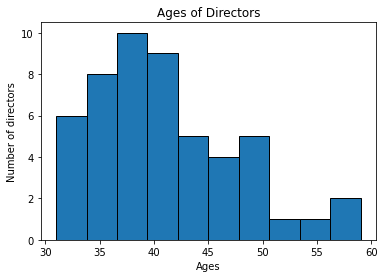

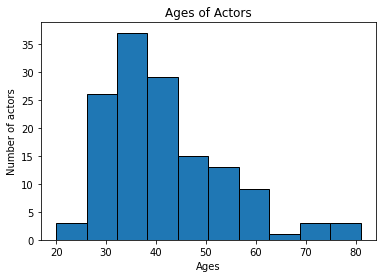

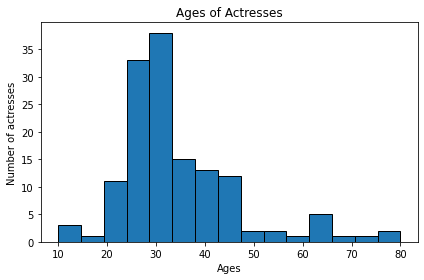

In [60]:
from matplotlib import pyplot as plt

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig2, ax3 = plt.subplots()

ages1 = directing['age']

ax1.hist(ages1, bins = 10, edgecolor = 'black')
ax1.set_title('Ages of Directors')
ax1.set_xlabel('Ages')
ax1.set_ylabel('Number of directors')

ages2 = actor['age']

ax2.hist(ages2, bins = 10, edgecolor = 'black')
ax2.set_title('Ages of Actors')
ax2.set_xlabel('Ages')
ax2.set_ylabel('Number of actors')

ages3 = actress['age']

ax3.hist(ages3, bins = 15, edgecolor = 'black')
ax3.set_title('Ages of Actresses')
ax3.set_xlabel('Ages')
ax3.set_ylabel('Number of actresses')


plt.tight_layout()
plt.show()

Now that it became clear to us about the ages of nominants, let's see which race ethnicity group they represent, and what is their religions. 

&#8595;Let's fill in a separate tables every group.

In [61]:
# Filling info into the separate tables
black = main_personal[main_personal['race_ethnicity'] == 'Black']
white = main_personal[main_personal['race_ethnicity'] == 'White']
asian = main_personal[main_personal['race_ethnicity'] == 'Asian']

In event of religions tt can be seen from our dataset that there are a lot of empty values - means that we could not know beliefs of every participant. 

&#8595;Thus, let's choose only those that are available.

In [62]:
# Filling info into another table and dropping duplicates
religion = main_personal[main_personal['religion'] != 'Na']
religion_types = religion['religion'].drop_duplicates()

In [63]:
catholic = main_personal[main_personal['religion'].str.find('Roman Catholic') == 0]
jewish = main_personal[main_personal['religion'].str.find('Jewish') == 0]
christian = main_personal[main_personal['religion'].str.find('Christian') == 0]
protestant = main_personal[main_personal['religion'].str.find('Protestant') == 0]
baptist = main_personal[main_personal['religion'].str.find('Baptist') == 0]
buddhist = main_personal[main_personal['religion'].str.find('Buddhist') == 0]
hindu = main_personal[main_personal['religion'].str.find('Hindu') == 0]
atheist = main_personal[main_personal['religion'].str.find('Atheist') == 0]

&#8595;I've decided to show both pie charts due to the relations of topics

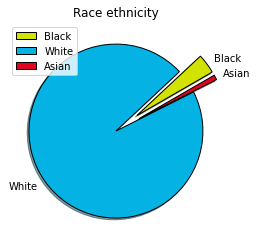

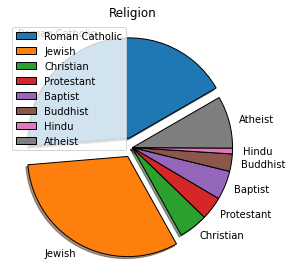

In [64]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()


slices1 = [black.size, white.size, asian.size]
labels1 = ['Black', 'White', 'Asian']
colors1 = ['#D2E304', '#04B3E3', '#E30421']
explode1 = [0.3, 0, 0.3]


slices2 = [len(catholic), len(jewish), len(christian), 
           len(protestant), len(baptist), len(buddhist),
          len(hindu), len(atheist)]
labels2 = ['Roman Catholic', 'Jewish', 'Christian',
          'Protestant', 'Baptist', 'Buddhist',
          'Hindu', 'Atheist']
explode2 = [0.1, 0.1, 0, 0, 0, 0, 0, 0]


ax1.pie(slices1, labels = labels1, explode = explode1, shadow = True, 
        startangle = 30, colors = colors1, 
        wedgeprops = {'edgecolor': 'black'})

ax2.pie(slices2, labels = labels2, explode = explode2, shadow = True, 
        startangle = 30, wedgeprops = {'edgecolor': 'black'})

ax1.legend()
ax1.set_title('Race ethnicity')

ax2.legend()
ax2.set_title('Religion')


plt.tight_layout()
plt.show()

###### Conclusion
It can be revealed that many directors are in the range of 35 and 45 years. There is a similarity with actors. Majority is in the range of 30 and 40. Same cannot be said for actresses. Most of them are between 25 and 35.

### 4.4. Analyze the changes in nominations

At this stage, more serious analysis could be carried out, but let's instead draw a poster for a future director or actor or any other person that is interested in cinema, so that this would be some motivation for him/her to become an Oscar nominant.

In [65]:
nomination = main.groupby(['category']).size().reset_index(name='counts')

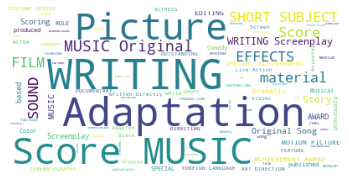

In [66]:
from wordcloud import WordCloud

wordcloud2 = WordCloud(background_color='white',max_font_size = 50).generate(' '.join(nomination['category']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

### 4.5. Analyze trendings through genres

Some poeple don't not like to divide arts into genres, but one way or another, any movie belongs to some genre. Genres can also have their own trends. For example, when the movie just appeared, no one thought to shoot in the fantasy genre. Thus, new trends emerge from time to time. 

&#8595;In this step, we are going to see how each genre has developed through the time. First, we need to remove duplicates that are in category and name columns. Actually, I could have done this is operation at the very beginning...

In [67]:
# Choosing multiple columns for dropping duplicates
main_detailed = main_detailed[main_detailed.duplicated(['category', 'name']) == False]

&#8593;It can be seen from our dataset that genres are not readable.

&#8595; Let's split them by split() function.

In [68]:
# Splitting 
genres = main_detailed['genres'].str.split('|', expand = True)
genres

,0,1,2,3,4,5,6
0,Drama,None,None,None,None,None,None
2,Drama,History,Western,None,None,None,None
4,Drama,None,None,None,None,None,None
5,War,Drama,Romance,None,None,None,None
7,Drama,Romance,None,None,None,None,None
...,...,...,...,...,...,...,...
19007,Family,Animation,Drama,None,None,None,None
19009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19011,Comedy,Foreign,None,None,None,None,None
19018,Drama,Romance,None,None,None,None,None


&#8593;Here we can see that some films may have 6 genres at once. It will be hard for us to consider all of them, that's why let's choose only from the first column(genres0). 

&#8595;Add it into the table 

In [69]:
# Adding new column
main_detailed['genres0'] = genres[0]

In order to see how genre has developed, we should count how many times it appeared during the year.

&#8595;Below we will be using groupping and counting for each genre

In [70]:
#Choosing genre that we need
drama_genre = main_detailed[main_detailed['genres0'] == 'Drama']

# Group by year, and count apperance
drama_genre = drama_genre.groupby(['year_film', 'genres0']).size().reset_index(name='counts')


# Same steps for remaining genres
war_genre = main_detailed[main_detailed['genres0'] == 'War']
war_genre = war_genre.groupby(['year_film', 'genres0']).size().reset_index(name='counts')

adv_genre = main_detailed[main_detailed['genres0'] == 'Adventure']
adv_genre = adv_genre.groupby(['year_film', 'genres0']).size().reset_index(name='counts')

com_genre = main_detailed[main_detailed['genres0'] == 'Comedy']
com_genre = com_genre.groupby(['year_film', 'genres0']).size().reset_index(name='counts')

fan_genre = main_detailed[main_detailed['genres0'] == 'Fantasy']
fan_genre = fan_genre.groupby(['year_film', 'genres0']).size().reset_index(name='counts')

hor_genre = main_detailed[main_detailed['genres0'] == 'Horror']
hor_genre = hor_genre.groupby(['year_film', 'genres0']).size().reset_index(name='counts')

scf_genre = main_detailed[main_detailed['genres0'] == 'Science Fiction']
scf_genre = scf_genre.groupby(['year_film', 'genres0']).size().reset_index(name='counts')

doc_genre = main_detailed[main_detailed['genres0'] == 'Documentary']
doc_genre = doc_genre.groupby(['year_film', 'genres0']).size().reset_index(name='counts')

It is important to mention that, we are not going to analyze every genre - only famous ones. Finally, let's draw our graphs. Simple line plot is the best choice for me. 

&#8595;I decided to show all the graphs at once by using subplots(). Total amount graphs is eight.

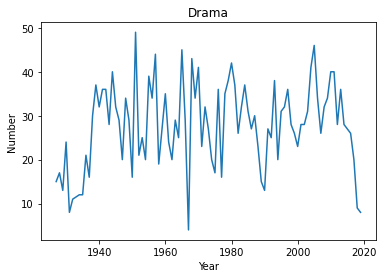

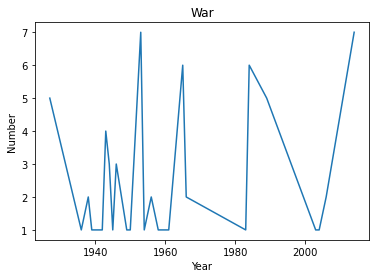

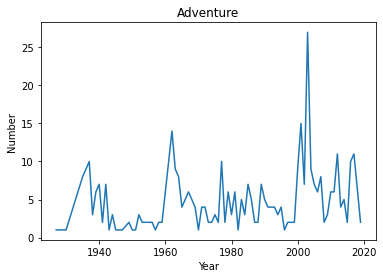

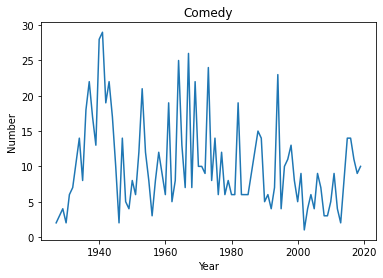

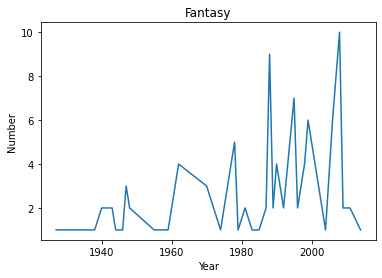

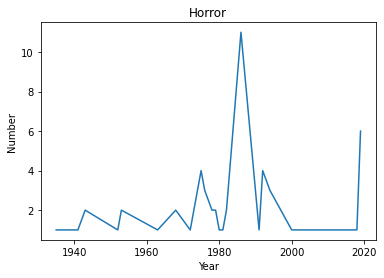

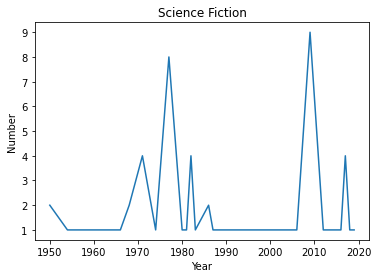

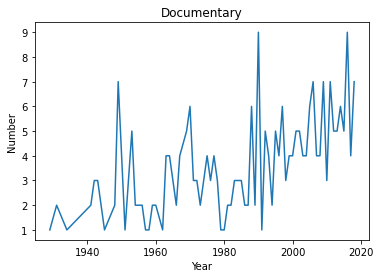

In [71]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig2, ax3 = plt.subplots()
fig1, ax4 = plt.subplots()
fig2, ax5 = plt.subplots()
fig2, ax6 = plt.subplots()
fig1, ax7 = plt.subplots()
fig2, ax8 = plt.subplots()


drama_year = drama_genre['year_film']
drama_counts = drama_genre['counts']

ax1.plot(drama_year, drama_counts)
ax1.set_title('Drama')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number')

war_year = war_genre['year_film']
war_counts = war_genre['counts']

ax2.plot(war_year, war_counts)
ax2.set_title('War')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number')

adv_year = adv_genre['year_film']
adv_counts = adv_genre['counts']

ax3.plot(adv_year, adv_counts)
ax3.set_title('Adventure')
ax3.set_xlabel('Year')
ax3.set_ylabel('Number')

com_year = com_genre['year_film']
com_counts = com_genre['counts']

ax4.plot(com_year, com_counts)
ax4.set_title('Comedy')
ax4.set_xlabel('Year')
ax4.set_ylabel('Number')

fan_year = fan_genre['year_film']
fan_counts = fan_genre['counts']

ax5.plot(fan_year, fan_counts)
ax5.set_title('Fantasy')
ax5.set_xlabel('Year')
ax5.set_ylabel('Number')

hor_year = hor_genre['year_film']
hor_counts = hor_genre['counts']

ax6.plot(hor_year, hor_counts)
ax6.set_title('Horror')
ax6.set_xlabel('Year')
ax6.set_ylabel('Number')

scf_year = scf_genre['year_film']
scf_counts = scf_genre['counts']

ax7.plot(scf_year, scf_counts)
ax7.set_title('Science Fiction')
ax7.set_xlabel('Year')
ax7.set_ylabel('Number')

doc_year = doc_genre['year_film']
doc_counts = doc_genre['counts']

ax8.plot(doc_year, doc_counts)
ax8.set_title('Documentary')
ax8.set_xlabel('Year')
ax8.set_ylabel('Number')


plt.show()

###### Conclusion
Well, not a few things can be said from the graphs above... let's just summarize few of them.
+ Drama: One thing can be said for sure. This graph is as dramatic as its genre. Еo be honest, I don’t know what a sharp jump up between 1940 and 1960 and a sharp jump down between 1960 and 1980 can mean. However, drama will always be relevant, because this is what the movie is based on. 
+ War: Сomparing with other charts, the line is quite gradual. It is not surprising that after the war there was a spike. Yes, nowadays there are a lot films about the war.
+ Adventure: Adventures were highly popular with our generation. Maybe this is somehow relates with Harry Potter release? It is very interesting that the line is falling for the last 5 years.
+ Comedy: It seems like in the 40s people were funny. I think Charlie Chaplin is the culprit. If we will look generally, comedy are becoming less popular.


It feels like these graphs show not information about the genre but the genre itself XD

## 5. Conclusion

Based on our analysis, we can conclude:

First, in fact people that are in the losers tables, are not losers... not everyone can be nominated for the most discussed award.
From Meryl Streep example it can be said that, to be truly the best in what you do, you should constantly be in the great form. Graphs above showed us that names of losers and winners are repeated, means every year the same people are trying to be in the list of nominants. 
P.S. Christopher Nolan is GOAT give him this damn statuette!!!

Second, as it turns out most of the films are released in winter. I think this iS because in winter people rarely go out and on weekends they go to the cinema in order to cheer themselves up. Besides, there are many holidays in winter. Of course there may be other reasons, only production companies know the  truth.

Third, we proved that there is a pattern and general trends associated with the age of the participants. Apparently, in order to be experienced in your field you need to spend some time on practice. The example of the directors proves it. You can not become a director right off the bat without the years of trainings.

Fourth, genres are not static, some develop along with technologies, and some remain in history. It is interesting to watch their changes. You'll never know exactly what genre can become popular. 